In [25]:
# relacion entre usos gratuitos y usos pagos
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
estaciones = pd.read_csv("estaciones_bicis .csv")
marzo = pd.read_csv("marzo_dataset .csv")
print(marzo.columns)
marzo.head()

Index(['Id_recorrido', 'duracion_recorrido', 'fecha_origen_recorrido',
       'id_estacion_origen', 'nombre_estacion_origen', 'id_estacion_destino',
       'nombre_estacion_destino', 'id_usuario', 'género'],
      dtype='object')


,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,id_estacion_destino,nombre_estacion_destino,id_usuario,género
0,17415328BAEcobici,520,2023-03-04 15:17:55,130BAEcobici,130 - RETIRO II,448BAEcobici,393 - Barrio 31,444458BAEcobici,FEMALE
1,17599063BAEcobici,847,2023-03-22 16:32:46,440BAEcobici,142 - ARMENIA,58BAEcobici,058 - Ministro Carranza,711954BAEcobici,OTHER
2,17575845BAEcobici,"2,084",2023-03-20 19:23:56,94BAEcobici,094 - GÚZMAN,236BAEcobici,254 - Plaza Rafael Hernandez,964367BAEcobici,MALE
3,17665972BAEcobici,476,2023-03-29 13:23:15,158BAEcobici,158 - VILLARROEL,206BAEcobici,159 - Fitz Roy & Gorriti,47678BAEcobici,FEMALE
4,17425224BAEcobici,"1,136",2023-03-06 08:33:28,116BAEcobici,116 - HOSPITAL ALEMÁN,114BAEcobici,114 - DELLA PAOLERA,2540BAEcobici,MALE


In [26]:
df_marzo = marzo[["fecha_origen_recorrido","duracion_recorrido","nombre_estacion_origen","nombre_estacion_destino", "género"]]
df_marzo = df_marzo.sort_values("duracion_recorrido", ascending = False)
print(len(df_marzo))
df_marzo.tail()

10000


,fecha_origen_recorrido,duracion_recorrido,nombre_estacion_origen,nombre_estacion_destino,género
9849,2023-03-07 16:08:16,"1,000",156 - Plaza Alemania,030 - Peña,MALE
6142,2023-03-01 14:07:36,"1,000",108 - Usina del Arte,373 - Jorgelina De Simone,MALE
3745,2023-03-05 09:15:05,"1,000",221 - CULPINA,374 - Puan,MALE
4031,2023-03-23 10:49:00,"1,000",083 - Paraná,018 - Independencia,FEMALE
420,2023-03-07 18:48:57,"1,000",190 - JUNCAL,390 - De Los Ombues,MALE


In [27]:
# recorridos_de_un_segundo = df_marzo[df_marzo['duracion_recorrido'] == "1,000" ] #eliminar estos de la df
# Definir una función para convertir la cadena a entero, considerando números mayores o iguales a 1000
def convertir_a_entero(valor):
    if ',' in valor:
        # Eliminar la coma si está presente
        valor = valor.replace(',', '')
    # Convertir a entero
    return int(valor)
df_marzo.duracion_recorrido = df_marzo.duracion_recorrido.apply(convertir_a_entero)

In [45]:
def convertir_a_segundos(valor):
    return float(valor/60) 
df_marzo.duracion_recorrido = df_marzo.duracion_recorrido.apply(convertir_a_segundos)

In [46]:
df_marzo.sort_values("duracion_recorrido", ascending= True)

,fecha_origen_recorrido,duracion_recorrido,nombre_estacion_origen,nombre_estacion_destino,género
6738,2023-03-13 08:52:19,1.016667,281 - Villa Urquiza,281 - Villa Urquiza,MALE
2150,2023-03-03 01:54:48,1.016667,113 - Guatemala,113 - Guatemala,FEMALE
975,2023-03-13 13:16:24,1.016667,102 - ROSETI,102 - ROSETI,FEMALE
1680,2023-03-15 06:16:04,1.033333,177 -PLANETARIO,177 -PLANETARIO,MALE
4538,2023-03-17 17:03:13,1.050000,261 - QUINTEROS LIDORO,261 - QUINTEROS LIDORO,MALE
...,...,...,...,...,...
4957,2023-03-05 21:43:49,584.250000,031 - Padilla,324 - Las Victorias,FEMALE
4100,2023-03-17 20:09:54,629.083333,108 - Usina del Arte,006 - Parque Lezama,FEMALE
5368,2023-03-15 23:52:33,655.083333,153 - JUAN MANUEL DE BLANES,153 - JUAN MANUEL DE BLANES,MALE
3756,2023-03-15 07:50:35,873.166667,147 - Constitución,021 - Parque Patricios,MALE


<Axes: ylabel='Count'>

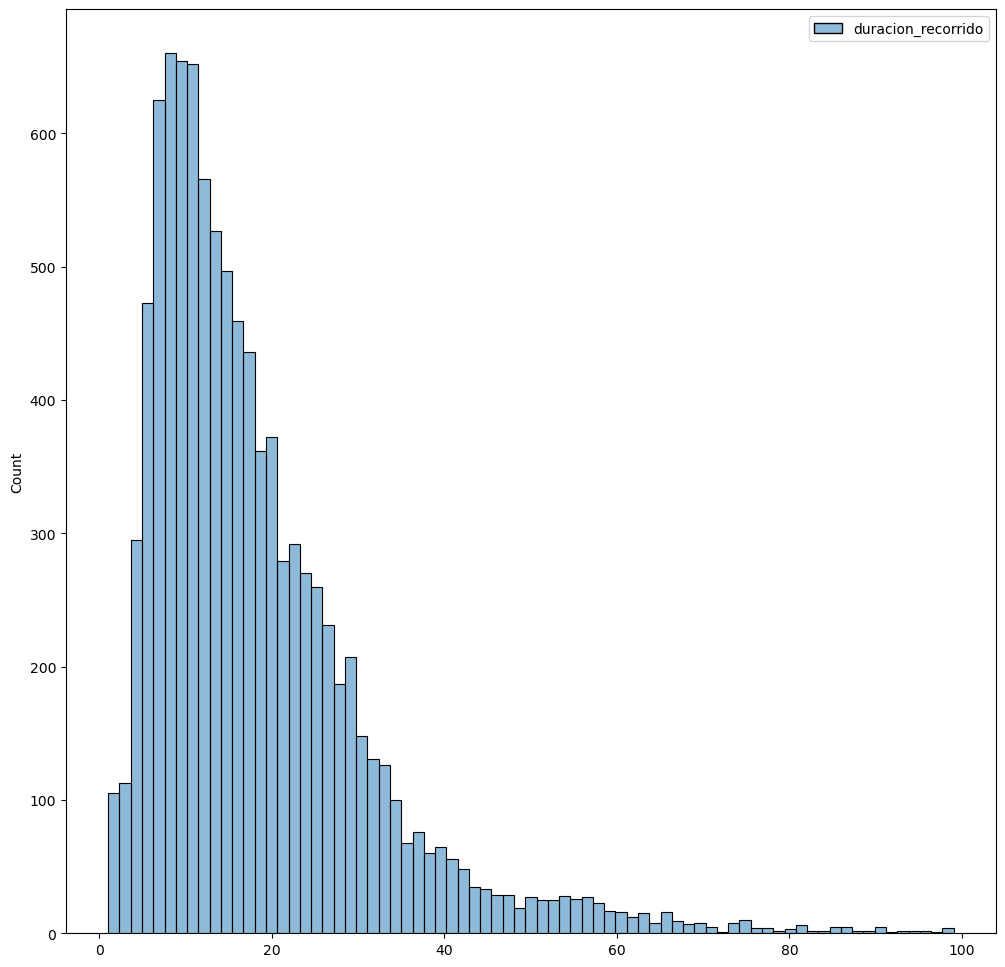

In [47]:
plt.figure(figsize= (12,12))
sns.histplot(df_marzo[df_marzo["duracion_recorrido"] <=  100])
